In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel('train.xlsx')
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
data.shape

(5961, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

### Rating

In [6]:
data['Rating']=data['Rating'].str.rstrip('%')
data['Rating']= data['Rating'].astype(float)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       5961 non-null   object 
 1   Experience          5961 non-null   object 
 2   Rating              2659 non-null   float64
 3   Place               5936 non-null   object 
 4   Profile             5961 non-null   object 
 5   Miscellaneous_Info  3341 non-null   object 
 6   Fees                5961 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 326.1+ KB


In [8]:
data['Rating'].fillna(data['Rating'].mean(),inplace=True)

In [9]:
data['Rating']= data['Rating'].astype(int)

In [10]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,94,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,94,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [11]:
data.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [12]:
# drop miscellaneous_info
data.drop(columns=['Miscellaneous_Info'],inplace=True)

### Train test split

In [13]:
# X = data.drop(columns=['Fees'])
# y= data['Fees']

In [14]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [15]:
# X_train.sample(3)

In [16]:
# y_train.sample(3)

In [17]:
# print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

### Profile

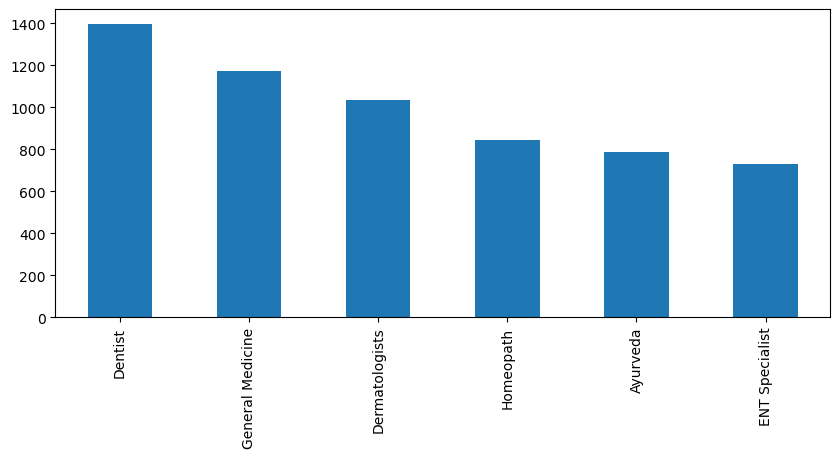

In [18]:
value_counts = data['Profile'].value_counts()
# Plotting a bar graph of value counts
value_counts.plot(kind='bar', figsize=(10, 4))
plt.show()

In [19]:
data.isnull().sum()

Qualification     0
Experience        0
Rating            0
Place            25
Profile           0
Fees              0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   object
 2   Rating         5961 non-null   int32 
 3   Place          5936 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int32(1), int64(1), object(4)
memory usage: 256.3+ KB


### Experience

In [21]:
data['Experience']=data['Experience'].str.split().str[0]
data['Experience']=data['Experience'].astype(int)

In [22]:
data.sample(3)

,Qualification,Experience,Rating,Place,Profile,Fees
3628,"MBBS, Diploma in Otorhinolaryngology (DLO), DN...",17,91,"Hebbal Kempapura, Bangalore",ENT Specialist,300
4661,"BDS, MDS - Orthodontics and Dentofacial Orthop...",6,100,"Tolichowki, Hyderabad",Dentist,200
4005,"BDS, MDS",8,94,"Saligramam, Chennai",Dentist,300


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   int32 
 2   Rating         5961 non-null   int32 
 3   Place          5936 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int32(2), int64(1), object(3)
memory usage: 233.0+ KB


### Place

In [24]:
data.sample(3)

,Qualification,Experience,Rating,Place,Profile,Fees
4092,MDS - Orthodontics and Dentofacial Orthopaedics,3,94,"Bhayandar West, Mumbai",Dentist,300
2466,"MD - Dermatology , Venereology & Leprosy, MBBS",5,100,"Indiranagar, Bangalore",Dermatologists,500
3608,"MBBS, MD - General Medicine",54,94,"Saibaba Colony, Coimbatore",General Medicine,200


In [25]:
data['City']=data['Place'].str.split(',').str[1]

In [26]:
data.sample(3)

,Qualification,Experience,Rating,Place,Profile,Fees,City
2835,"BHMS, MD - Homeopathy",18,99,"Indiranagar, Bangalore",Homeopath,500,Bangalore
297,"BDS, MDS - Periodontics",9,94,"Kandivali West, Mumbai",Dentist,100,Mumbai
3565,"BHMS, Diploma in Acupressure Therapy",10,94,"Masab Tank, Hyderabad",Homeopath,300,Hyderabad


In [27]:
data.drop(columns=['Place'],axis=1,inplace=True)

In [28]:
colns= [' Coimbatore',' Ernakulam',' Thiruvananthapuram',' Sector 5']
data['City']=data['City'].replace(colns,'Others')

In [29]:
data['City']=data['City'].replace('Bangalore',' Bangalore')

In [30]:
data.sample(3)

,Qualification,Experience,Rating,Profile,Fees,City
4901,"MBBS, MS - ENT",16,94,ENT Specialist,700,Delhi
2559,"MBBS, CCEDM",42,94,General Medicine,100,Others
103,"BDS, MDS - Periodontology and Oral Implantology",20,100,Dentist,100,Chennai


In [31]:
data.isnull().sum()

Qualification     0
Experience        0
Rating            0
Profile           0
Fees              0
City             26
dtype: int64

In [32]:
data.describe(include='object')

,Qualification,Profile,City
count,5961,5961,5935
unique,1420,6,6
top,BDS,Dentist,Bangalore
freq,488,1397,1258


In [33]:
data['City']=data['City'].fillna('Bangalore')

In [34]:
data.isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
Fees             0
City             0
dtype: int64

In [35]:
data.sample(5)

,Qualification,Experience,Rating,Profile,Fees,City
4838,"MBBS, MS - ENT",19,89,General Medicine,500,Bangalore
926,"MBBS, MD - Dermatology , Venereology & Leprosy",11,94,Dermatologists,500,Delhi
3327,"BDS, MDS - Conservative Dentistry & Endodontics",19,99,Dentist,500,Bangalore
4951,"MBBS, MS - ENT",32,94,ENT Specialist,100,Delhi
3629,"BAMS, MD - Ayurveda Medicine",16,94,Ayurveda,400,Bangalore


### Qualification

In [36]:
data['Qualification'].value_counts()

BDS                                                                                                                           488
BHMS                                                                                                                          477
BAMS                                                                                                                          471
MBBS                                                                                                                          334
MBBS, MS - ENT                                                                                                                220
                                                                                                                             ... 
MBBS, F.C.I.P                                                                                                                   1
BAMS, PG Diploma in Panchakarma                                                           

In [37]:
data['Qualification_count']= data['Qualification'].apply(lambda x: len(x.split(',')))

<Axes: >

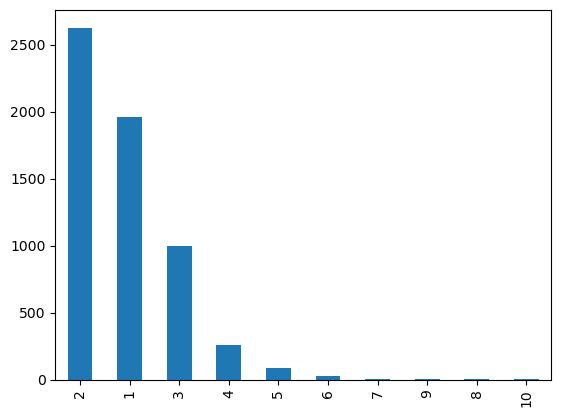

In [38]:
data['Qualification_count'].value_counts().plot(kind='bar')

In [39]:
data.head()

,Qualification,Experience,Rating,Profile,Fees,City,Qualification_count
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,Others,2
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,Bangalore,2
2,"MBBS, MS - Otorhinolaryngology",9,94,ENT Specialist,300,Bangalore,2
3,"BSc - Zoology, BAMS",12,94,Ayurveda,250,Bangalore,2
4,BAMS,20,100,Ayurveda,250,Chennai,1


In [40]:
data.drop(columns=['Qualification'],axis=1,inplace=True)

In [41]:
data.head()

,Experience,Rating,Profile,Fees,City,Qualification_count
0,24,100,Homeopath,100,Others,2
1,12,98,Ayurveda,350,Bangalore,2
2,9,94,ENT Specialist,300,Bangalore,2
3,12,94,Ayurveda,250,Bangalore,2
4,20,100,Ayurveda,250,Chennai,1


In [42]:
#Creating the first transformer for my pipeline
trf1= ColumnTransformer([
    ('ohe_profile',OneHotEncoder(sparse=False,drop='first'),[2,4])
],remainder='passthrough')

In [43]:
#Creating the second transformer for my pipeline
trf2 = ColumnTransformer([
    ('scaler',StandardScaler(),slice(0,14))
],remainder='passthrough')

In [44]:
data.head()

,Experience,Rating,Profile,Fees,City,Qualification_count
0,24,100,Homeopath,100,Others,2
1,12,98,Ayurveda,350,Bangalore,2
2,9,94,ENT Specialist,300,Bangalore,2
3,12,94,Ayurveda,250,Bangalore,2
4,20,100,Ayurveda,250,Chennai,1
